# sk-learn

## Install

`(project-0610) λ conda install scikit-learn`

## Basic

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


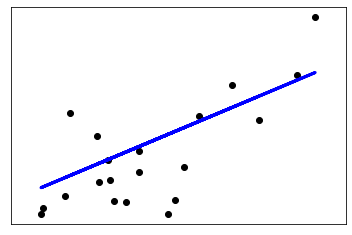

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" %
      mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Data

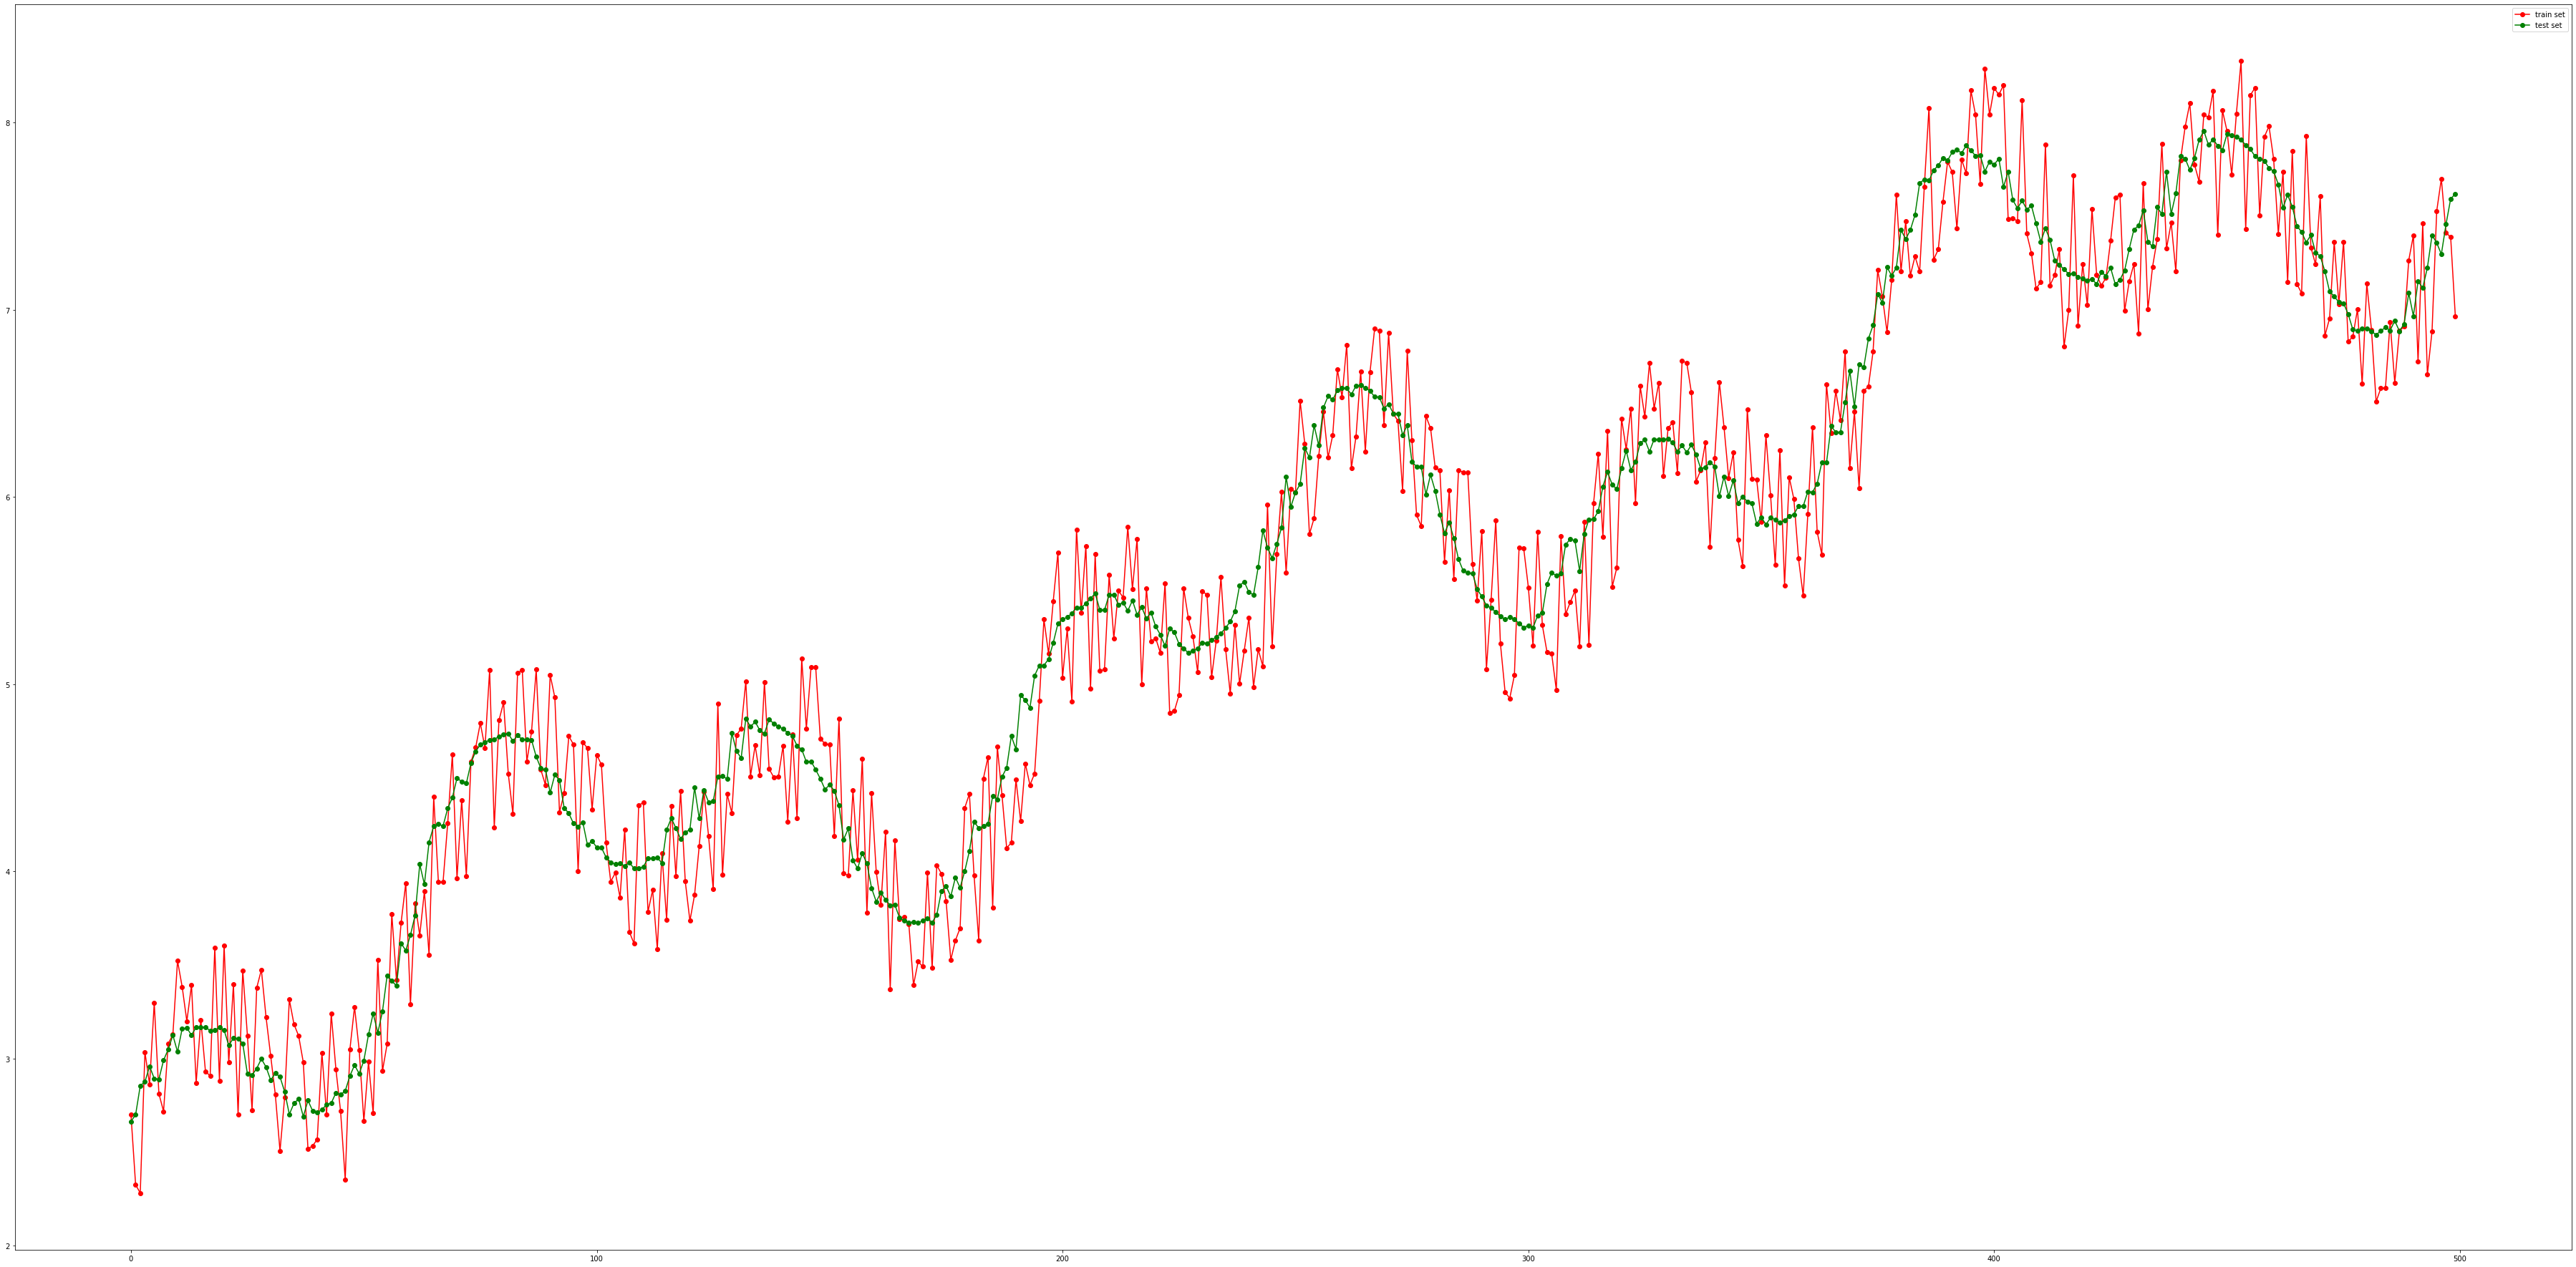

In [67]:
import numpy as np
import matplotlib.pyplot as plt


def f(x1, x2):
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2) + 3 + 0.1 * x1
    return y


def load_data():
    ''' 准备 训练集 和 测试集'''
    x1_train = np.linspace(0, 50, 500)
    x2_train = np.linspace(-10, 10, 500)
    data_train = np.array([[x1, x2,
                            f(x1, x2) + (np.random.random(1) - 0.5)]
                           for x1, x2 in zip(x1_train, x2_train)])
    x1_test = np.linspace(0, 50, 500) + 0.5 * np.random.random(500)
    x2_test = np.linspace(-10, 10, 500) + 0.02 * np.random.random(500)
    data_test = np.array([[x1, x2, f(x1, x2)]
                          for x1, x2 in zip(x1_test, x2_test)])
    return data_train, data_test


train, test = load_data()
x_train, y_train = train[:, :2], train[:, 2]  # 数据前两列是 x1,x2 第三列是 y, y 有随机噪声
x_test, y_test = test[:, :2], test[:, 2]  # 同上, y 没有噪声


def try_different_method(clf):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, 'go-', label='true value')
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value')
    plt.title('score: %f' % score)
    print('score:', score)
    plt.legend()
    plt.show()


def initial():
    ''' 绘制 训练集 和 测试集 '''
    plt.rcParams['figure.figsize'] = (64.0, 32.0)  # 设置 figure_size 尺寸
    plt.figure()
    plt.plot(np.arange(len(x_train)), y_train, 'ro-', label='train set')
    plt.plot(np.arange(len(x_test)), y_test, 'go-', label='test set')
    plt.legend()
    plt.show()


initial()

## Linear Regression

score: 0.8879172748613308


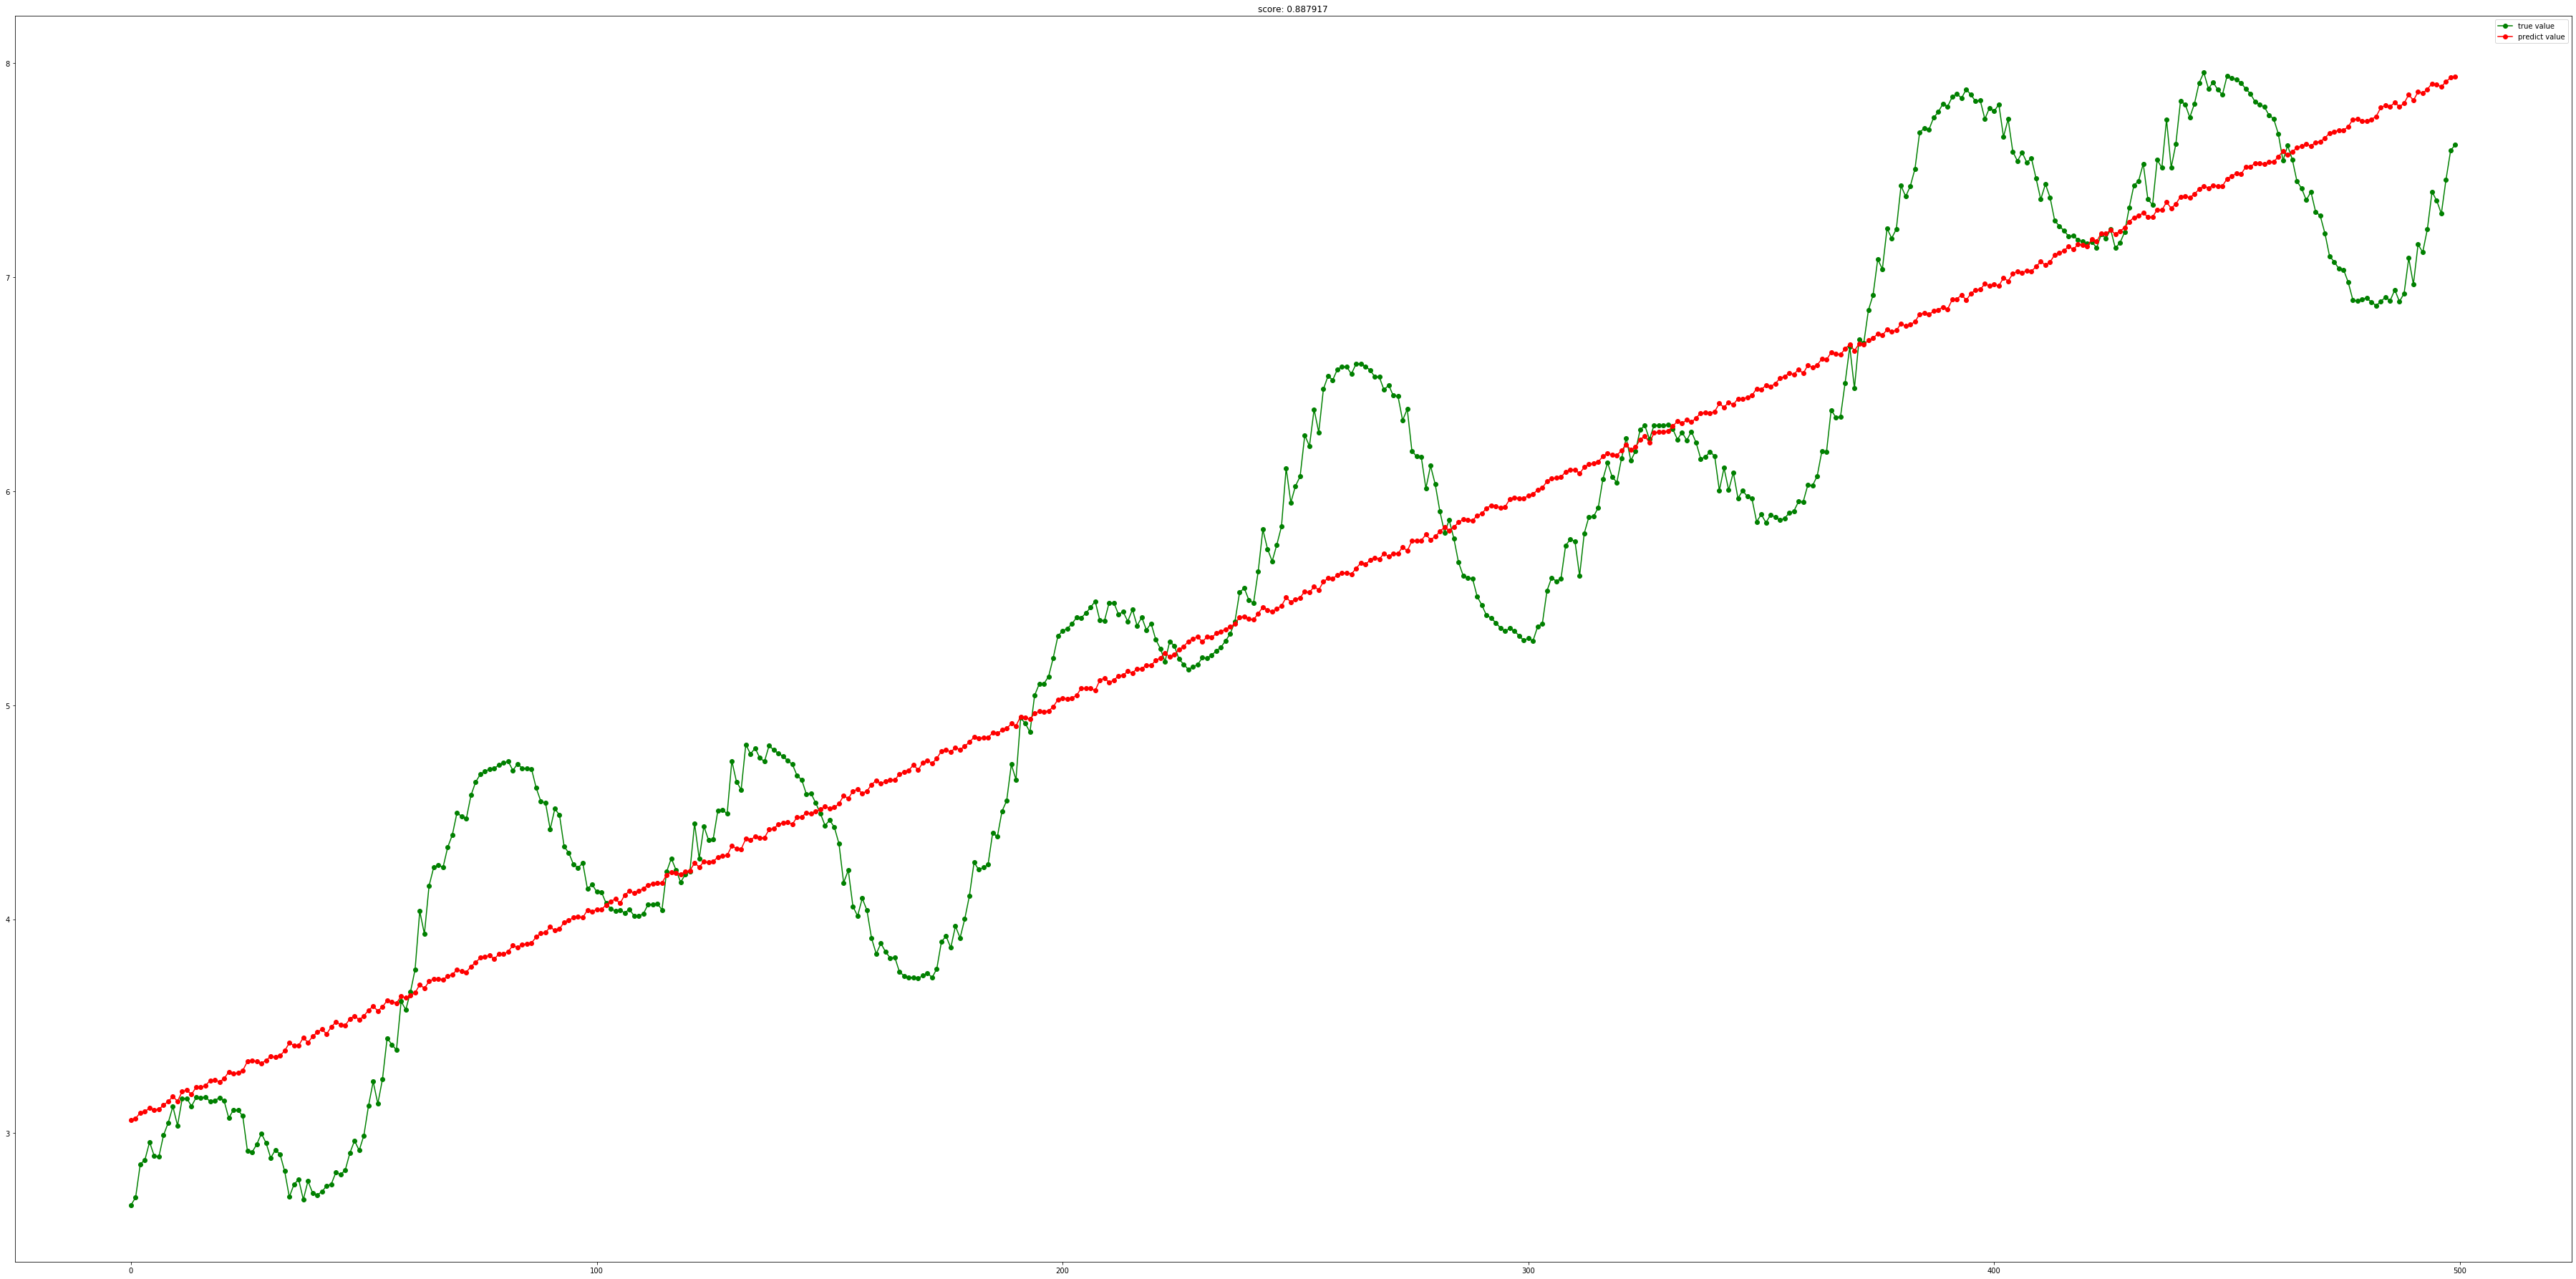

In [68]:
# 线性回归算法 Linear Regression

from sklearn import linear_model

linear_reg = linear_model.LinearRegression()

try_different_method(linear_reg)

## Decision Tree

score: 0.9577115933525184


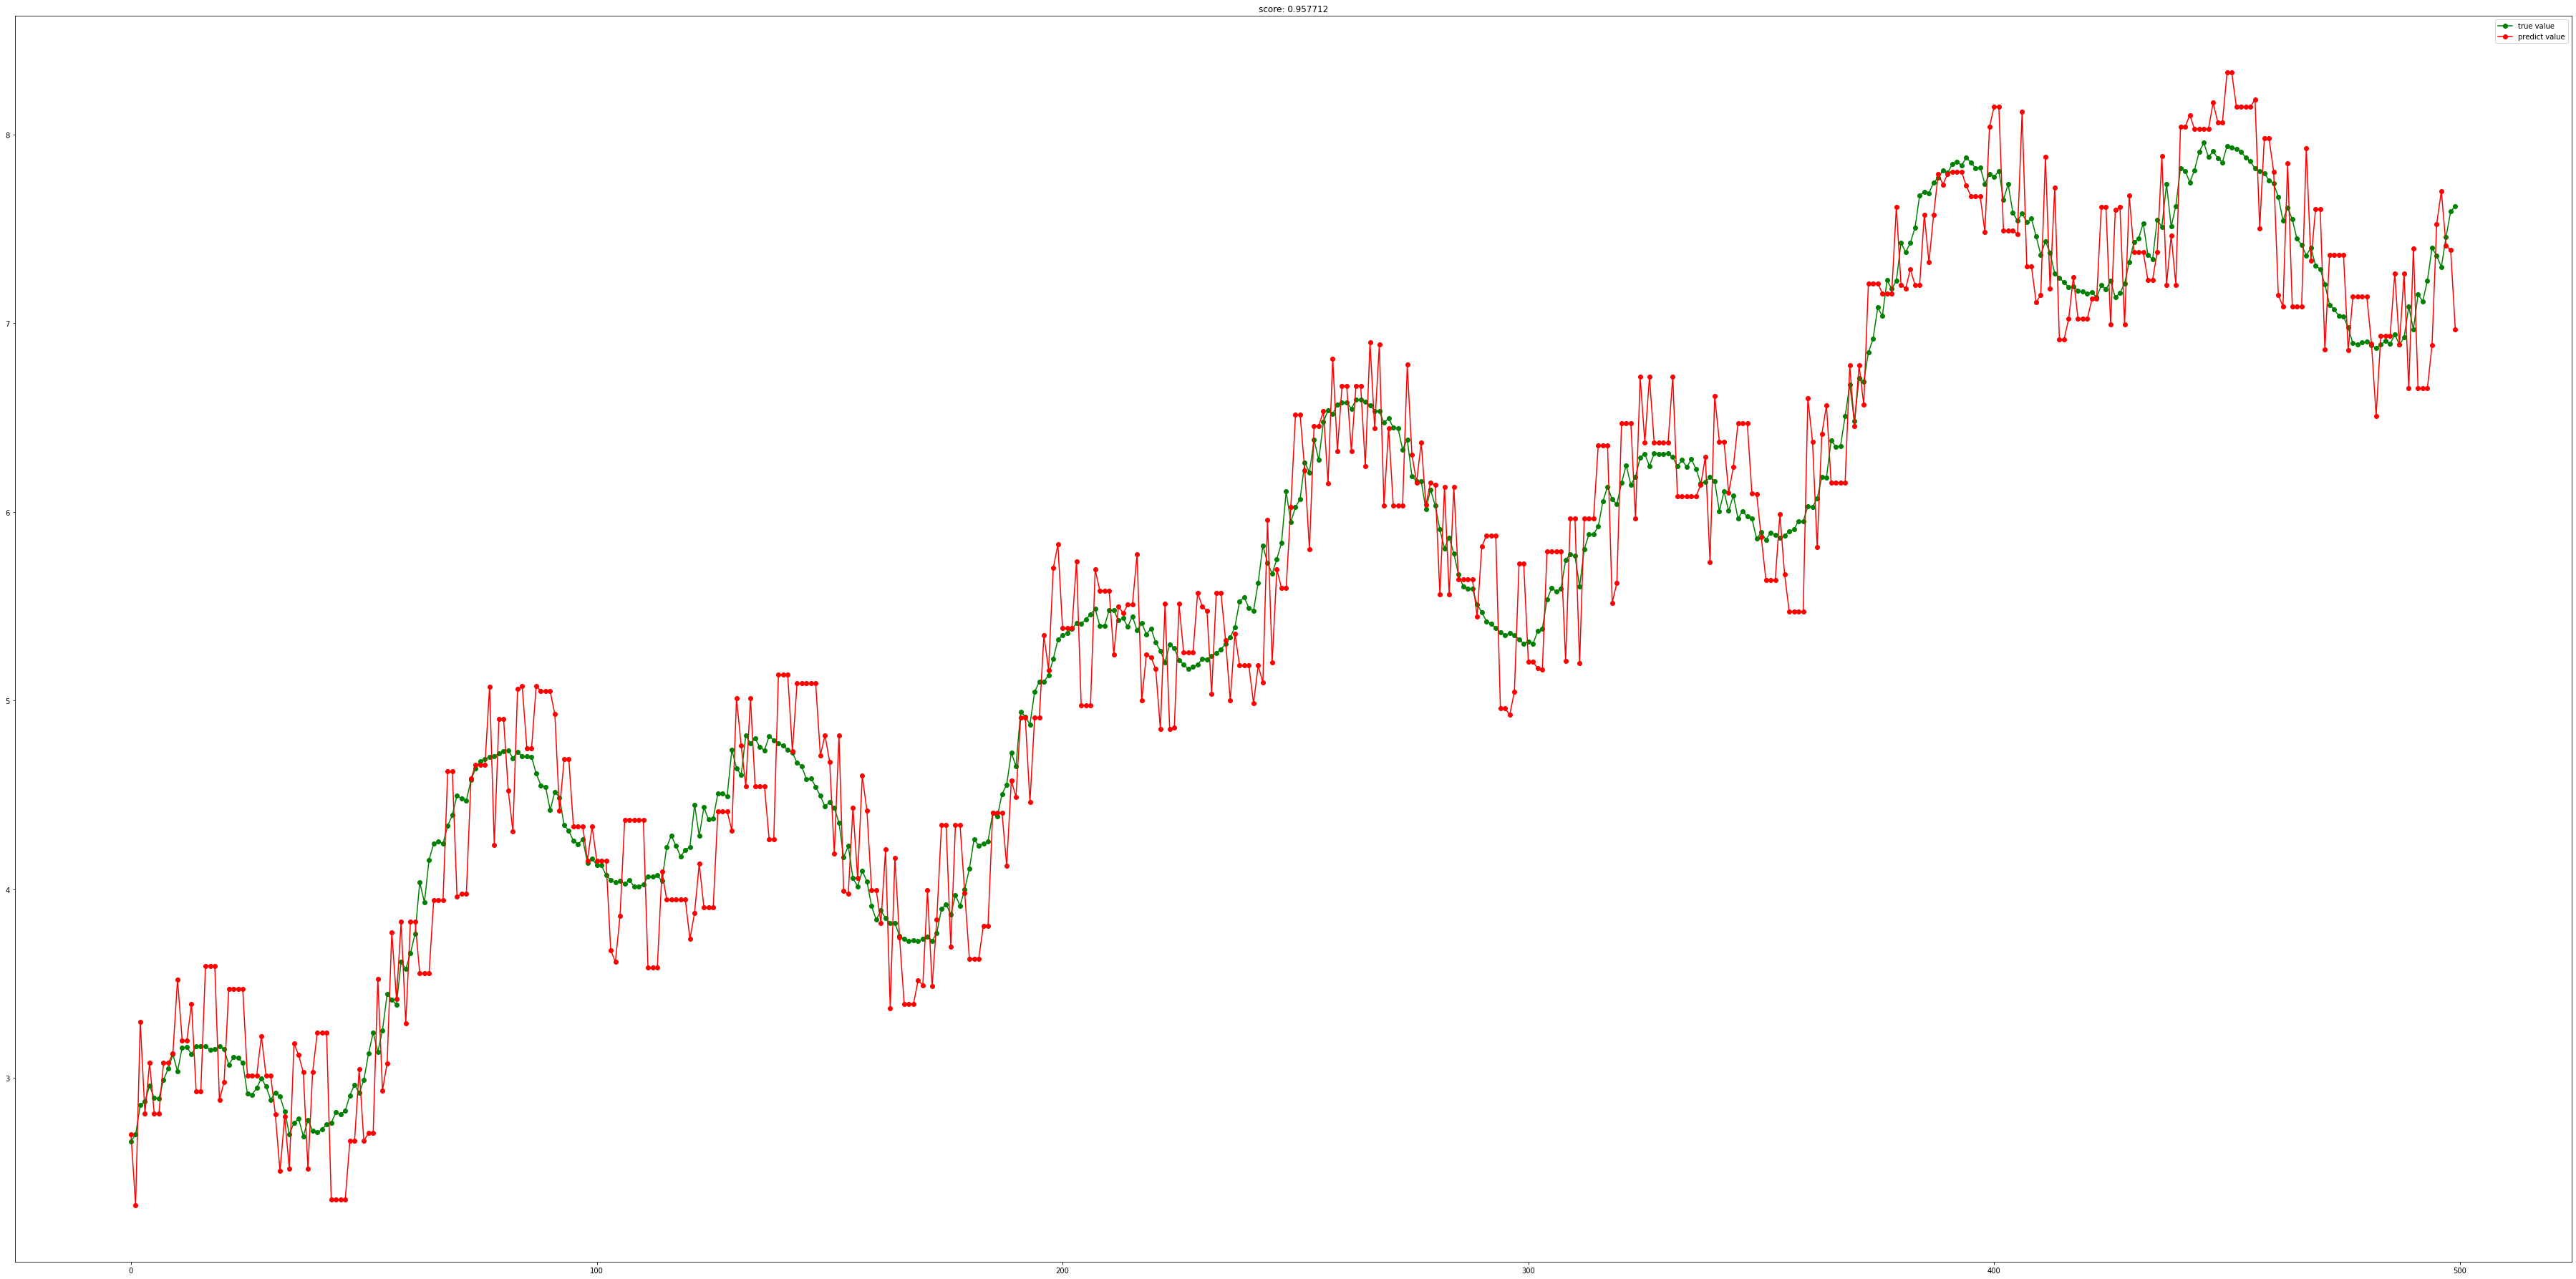

In [69]:
# 决策树算法 Decision Tree
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
try_different_method(tree_reg)

## Support Vector Machine

score: 0.9931934057919501


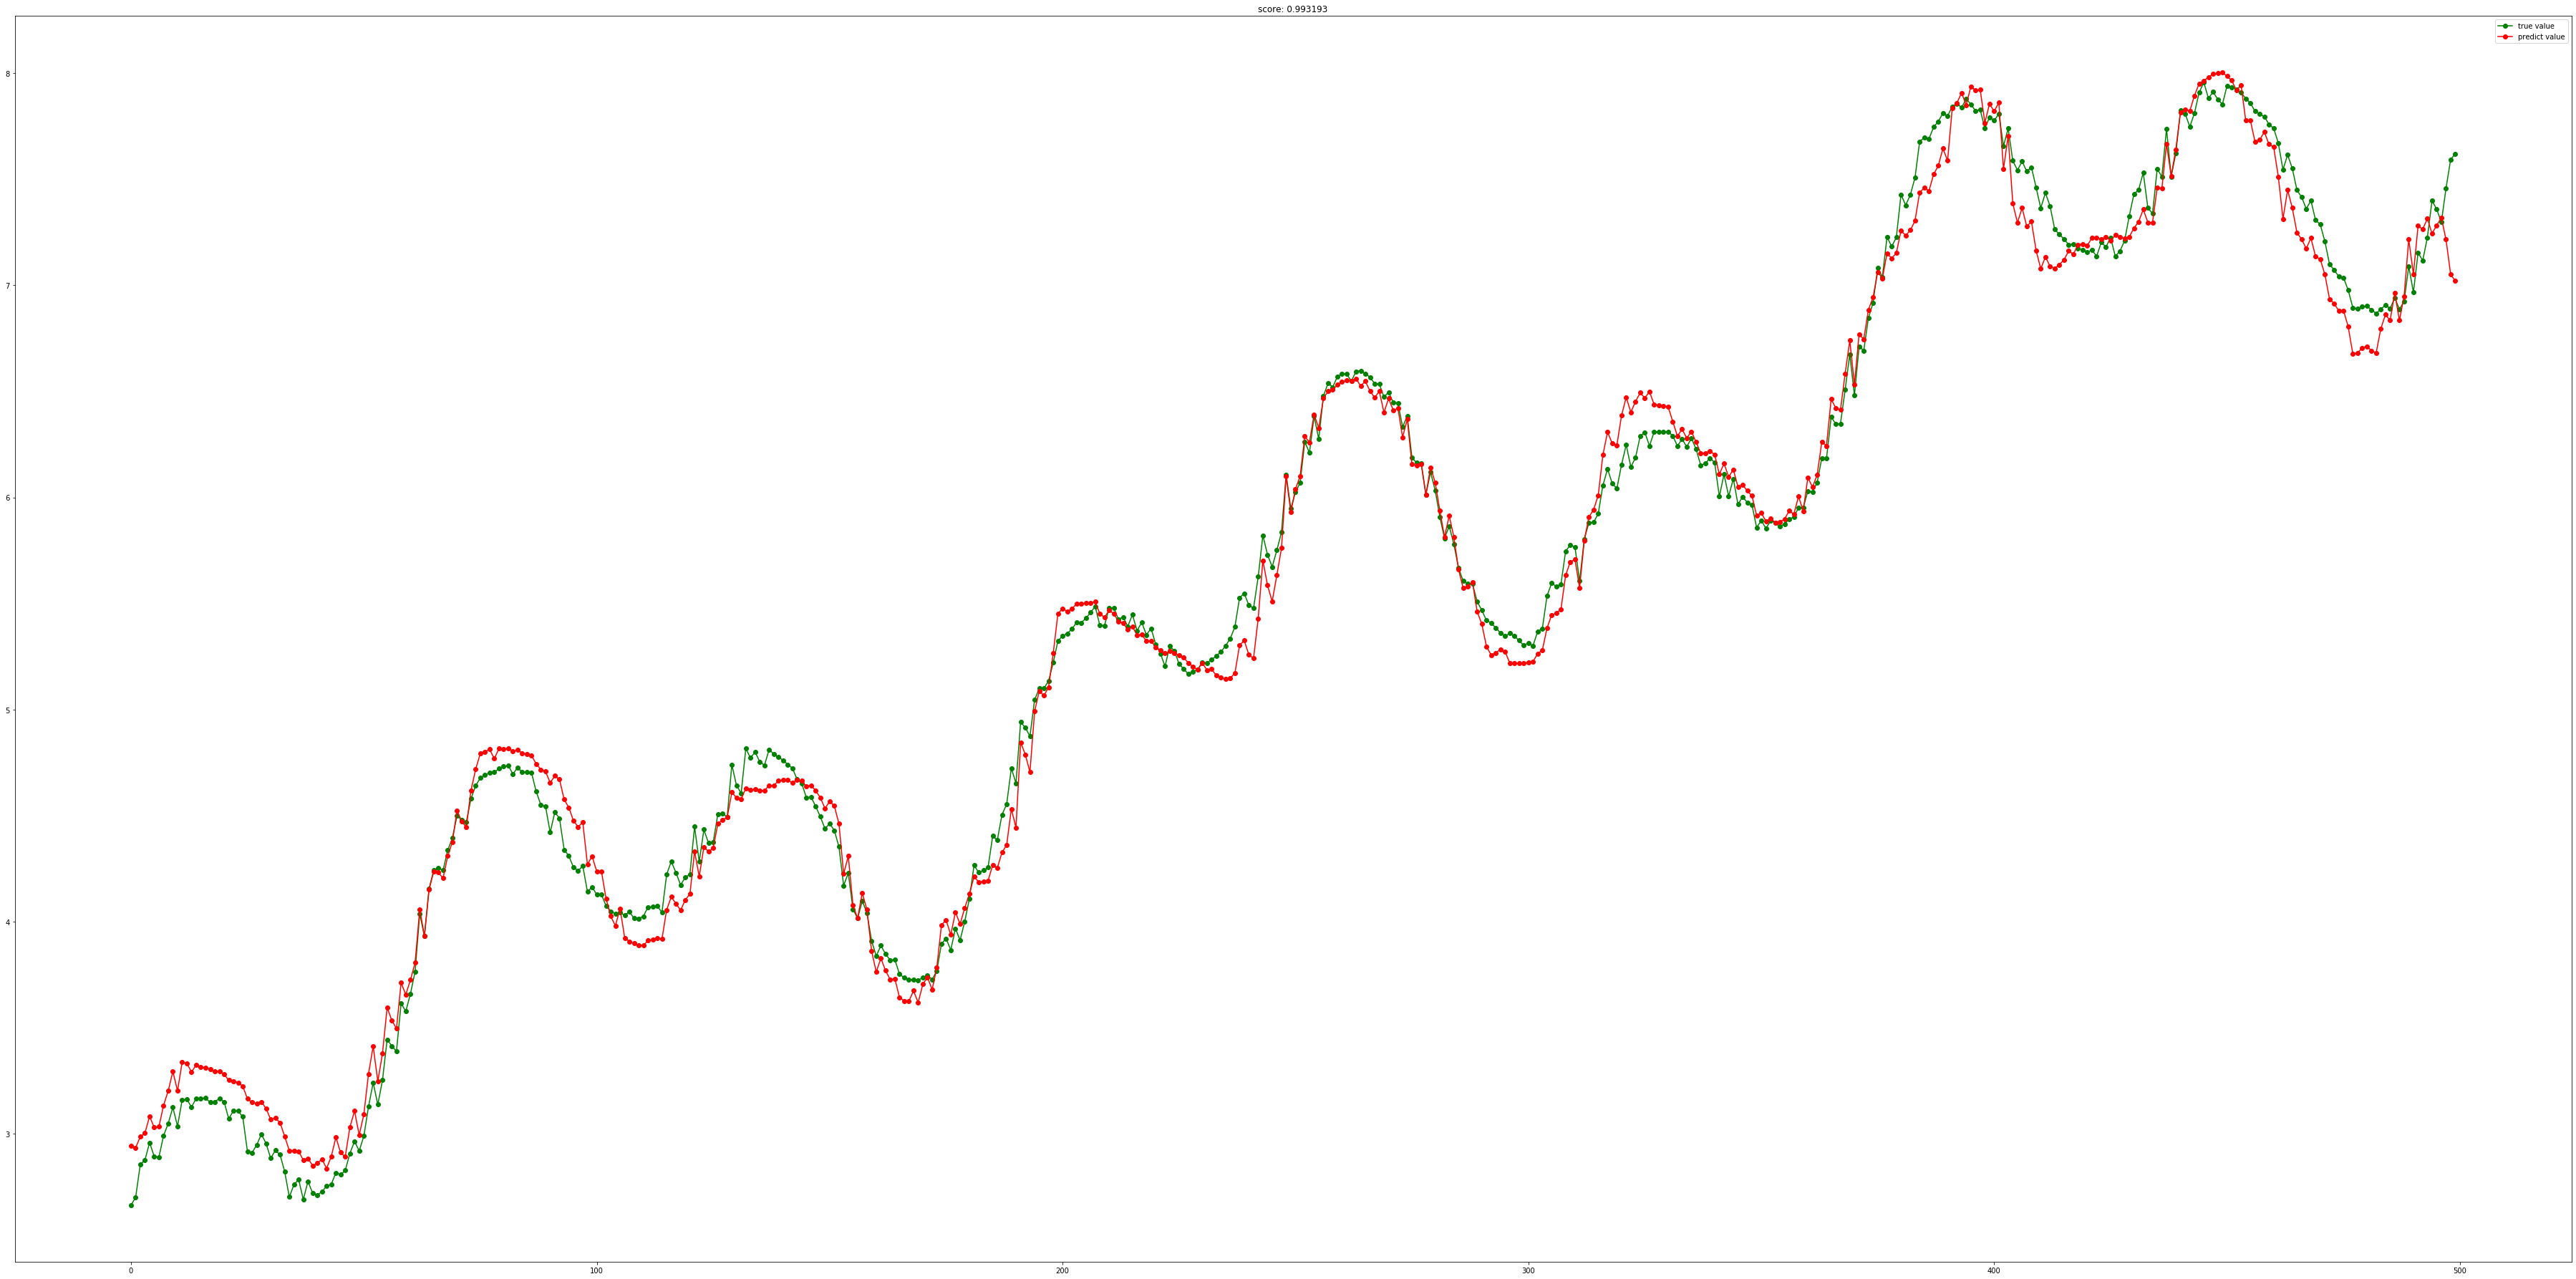

In [70]:
# 支持向量机算法 Support Vector Machine,SVM

from sklearn import svm

svr = svm.SVR(gamma='auto')

try_different_method(svr)

## K-Nearest Neighbors

score: 0.9928967297274761


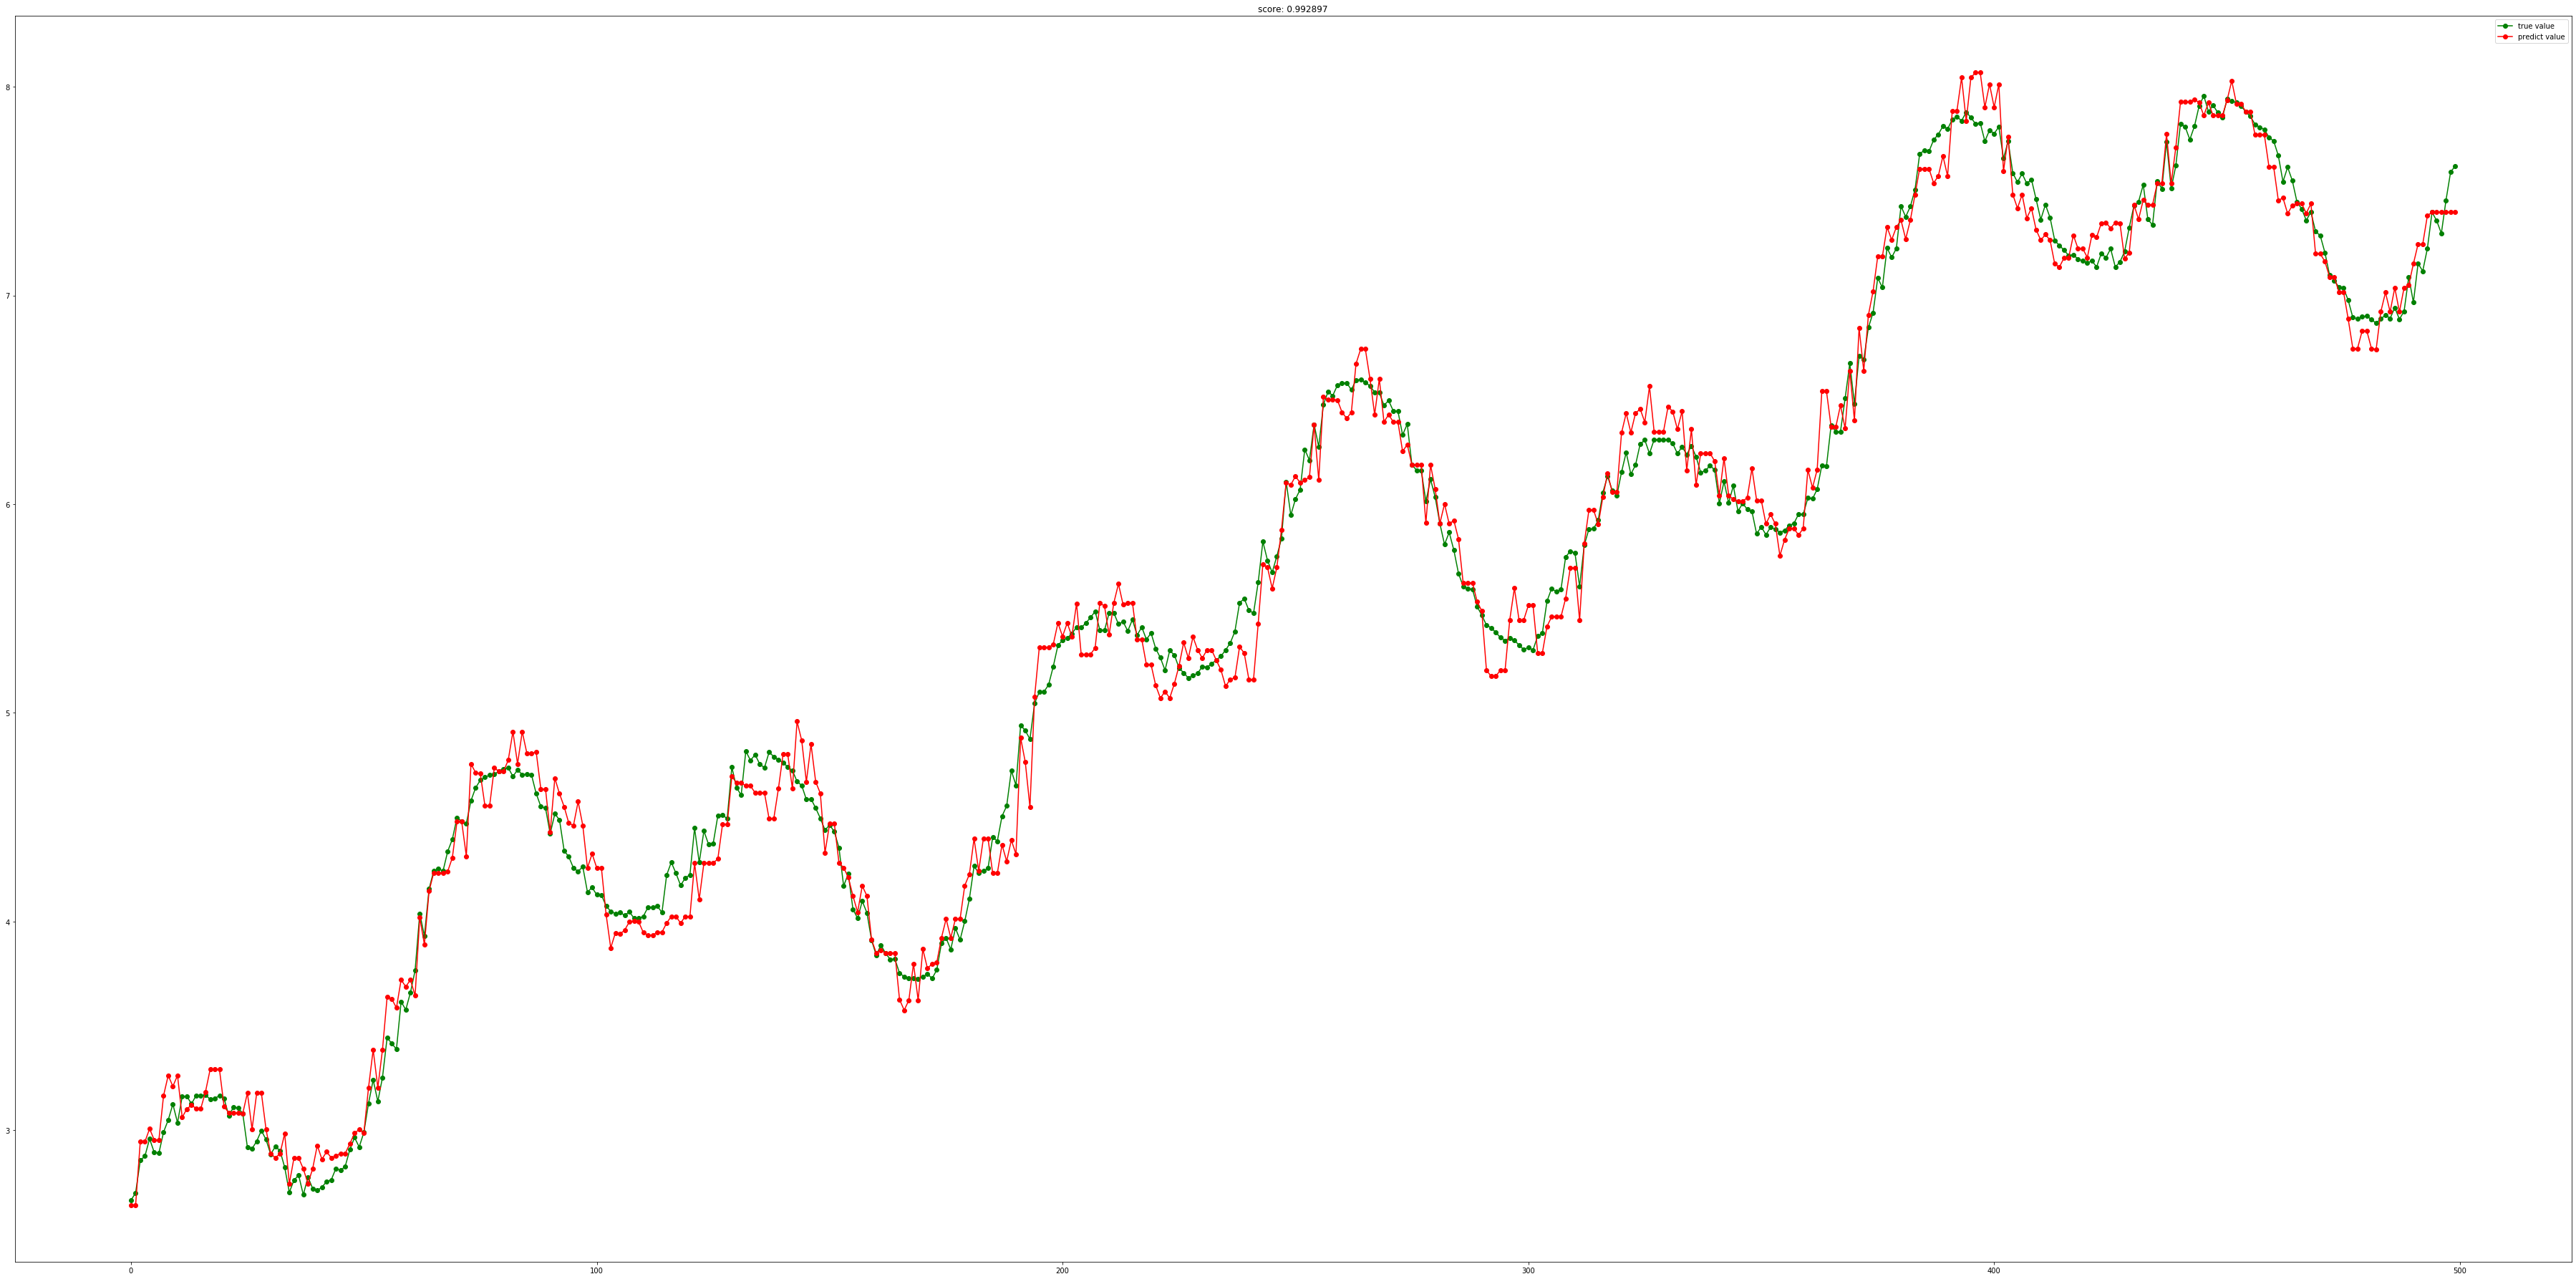

In [71]:
# 最近邻居 / K-近邻算法 K-Nearest Neighbors KNN

from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()

try_different_method(knn)

## Random Forest

score: 0.9878702652245214


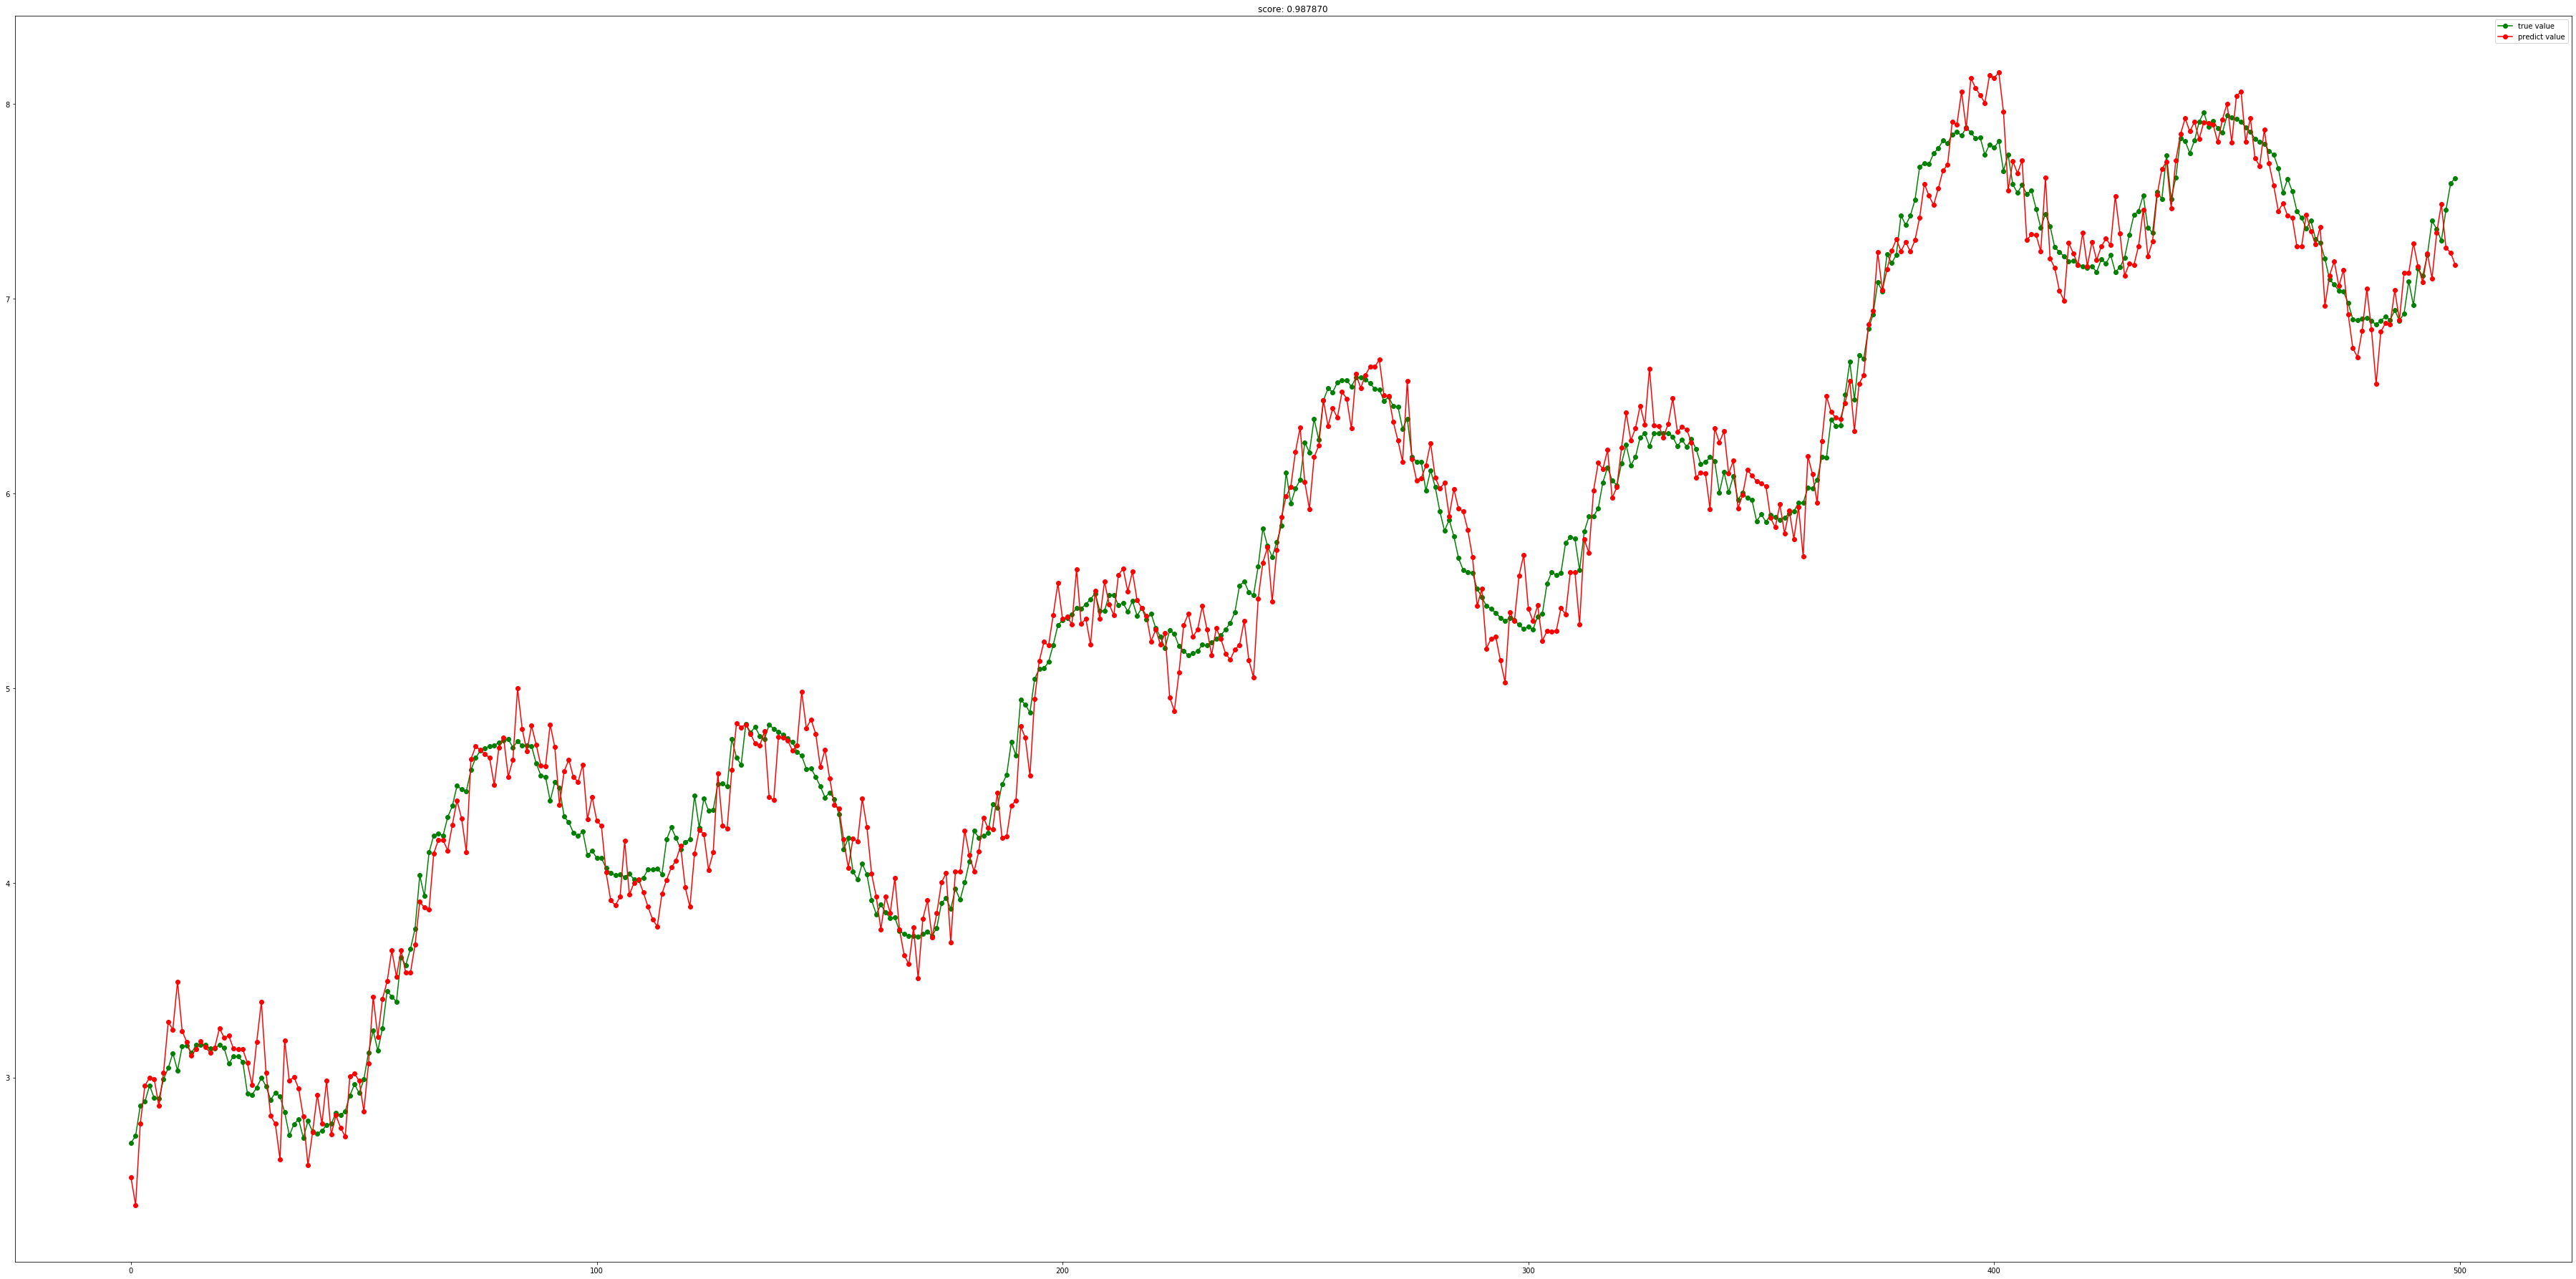

In [72]:
# 随机森林算法 Random Forest

from sklearn import ensemble

rf =ensemble.RandomForestRegressor(n_estimators=20)  # 这里使用20个决策树

try_different_method(rf)


## Adaptive Boosting

score: 0.9683019633720553


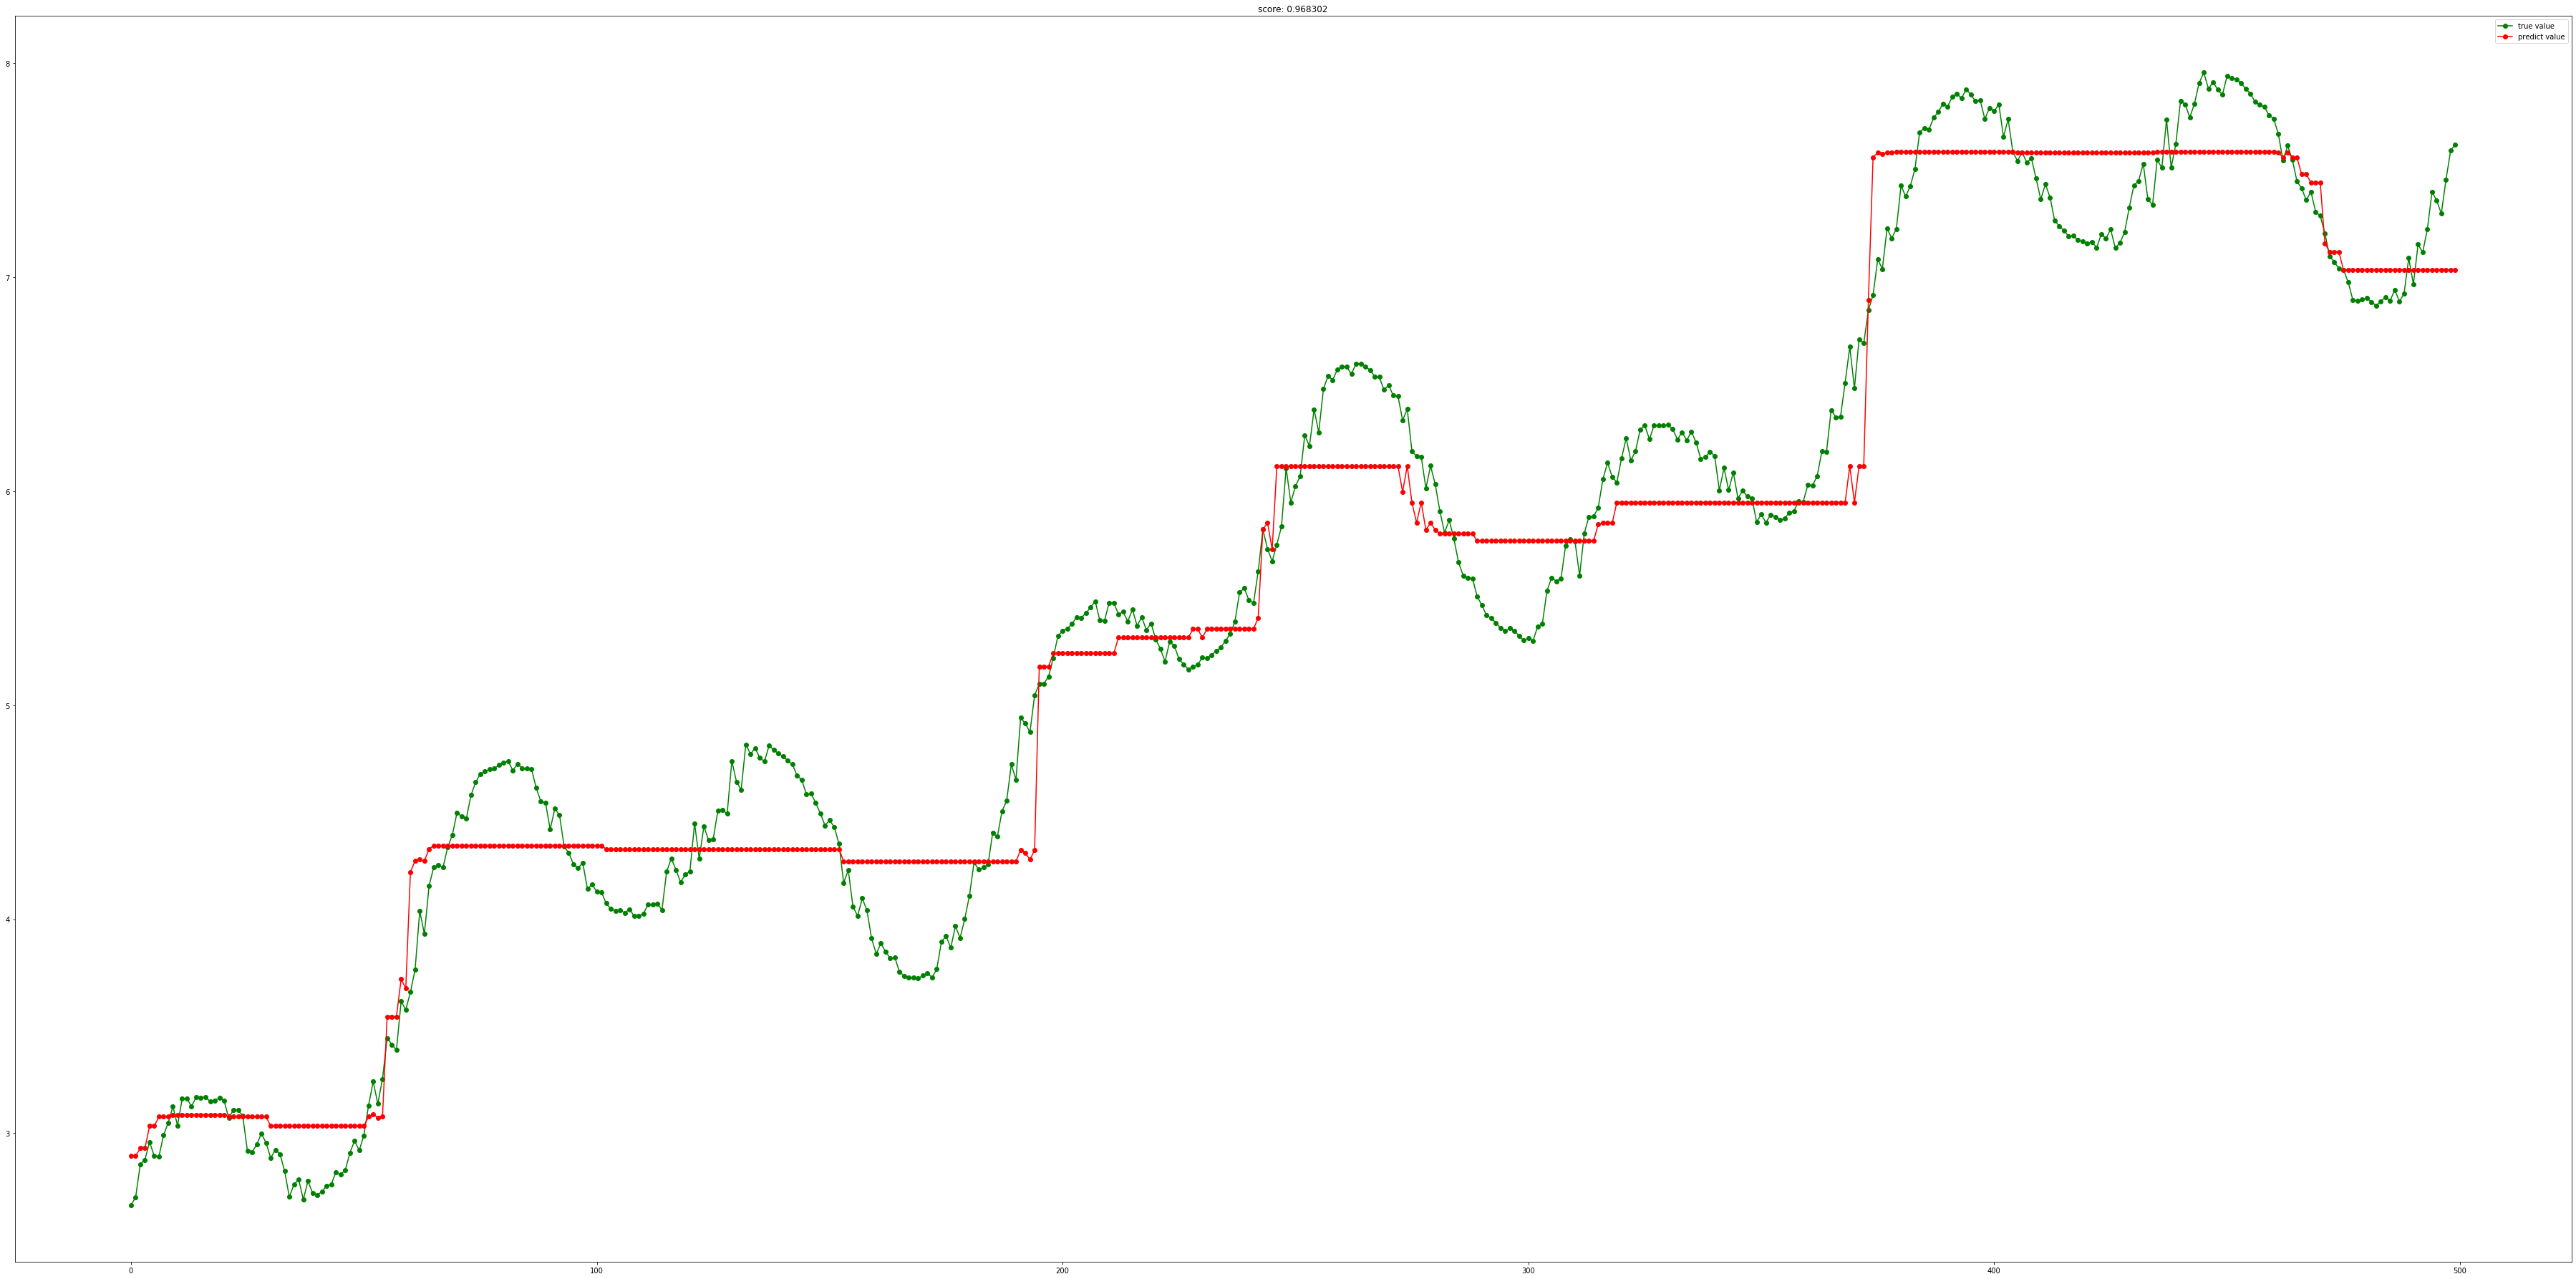

In [75]:
#自适应增强算法  Adaptive Boosting Adaboost

ada = ensemble.AdaBoostRegressor(n_estimators=50)

try_different_method(ada)

## Gradient BoostDecision Tree

score: 0.9936287855132274


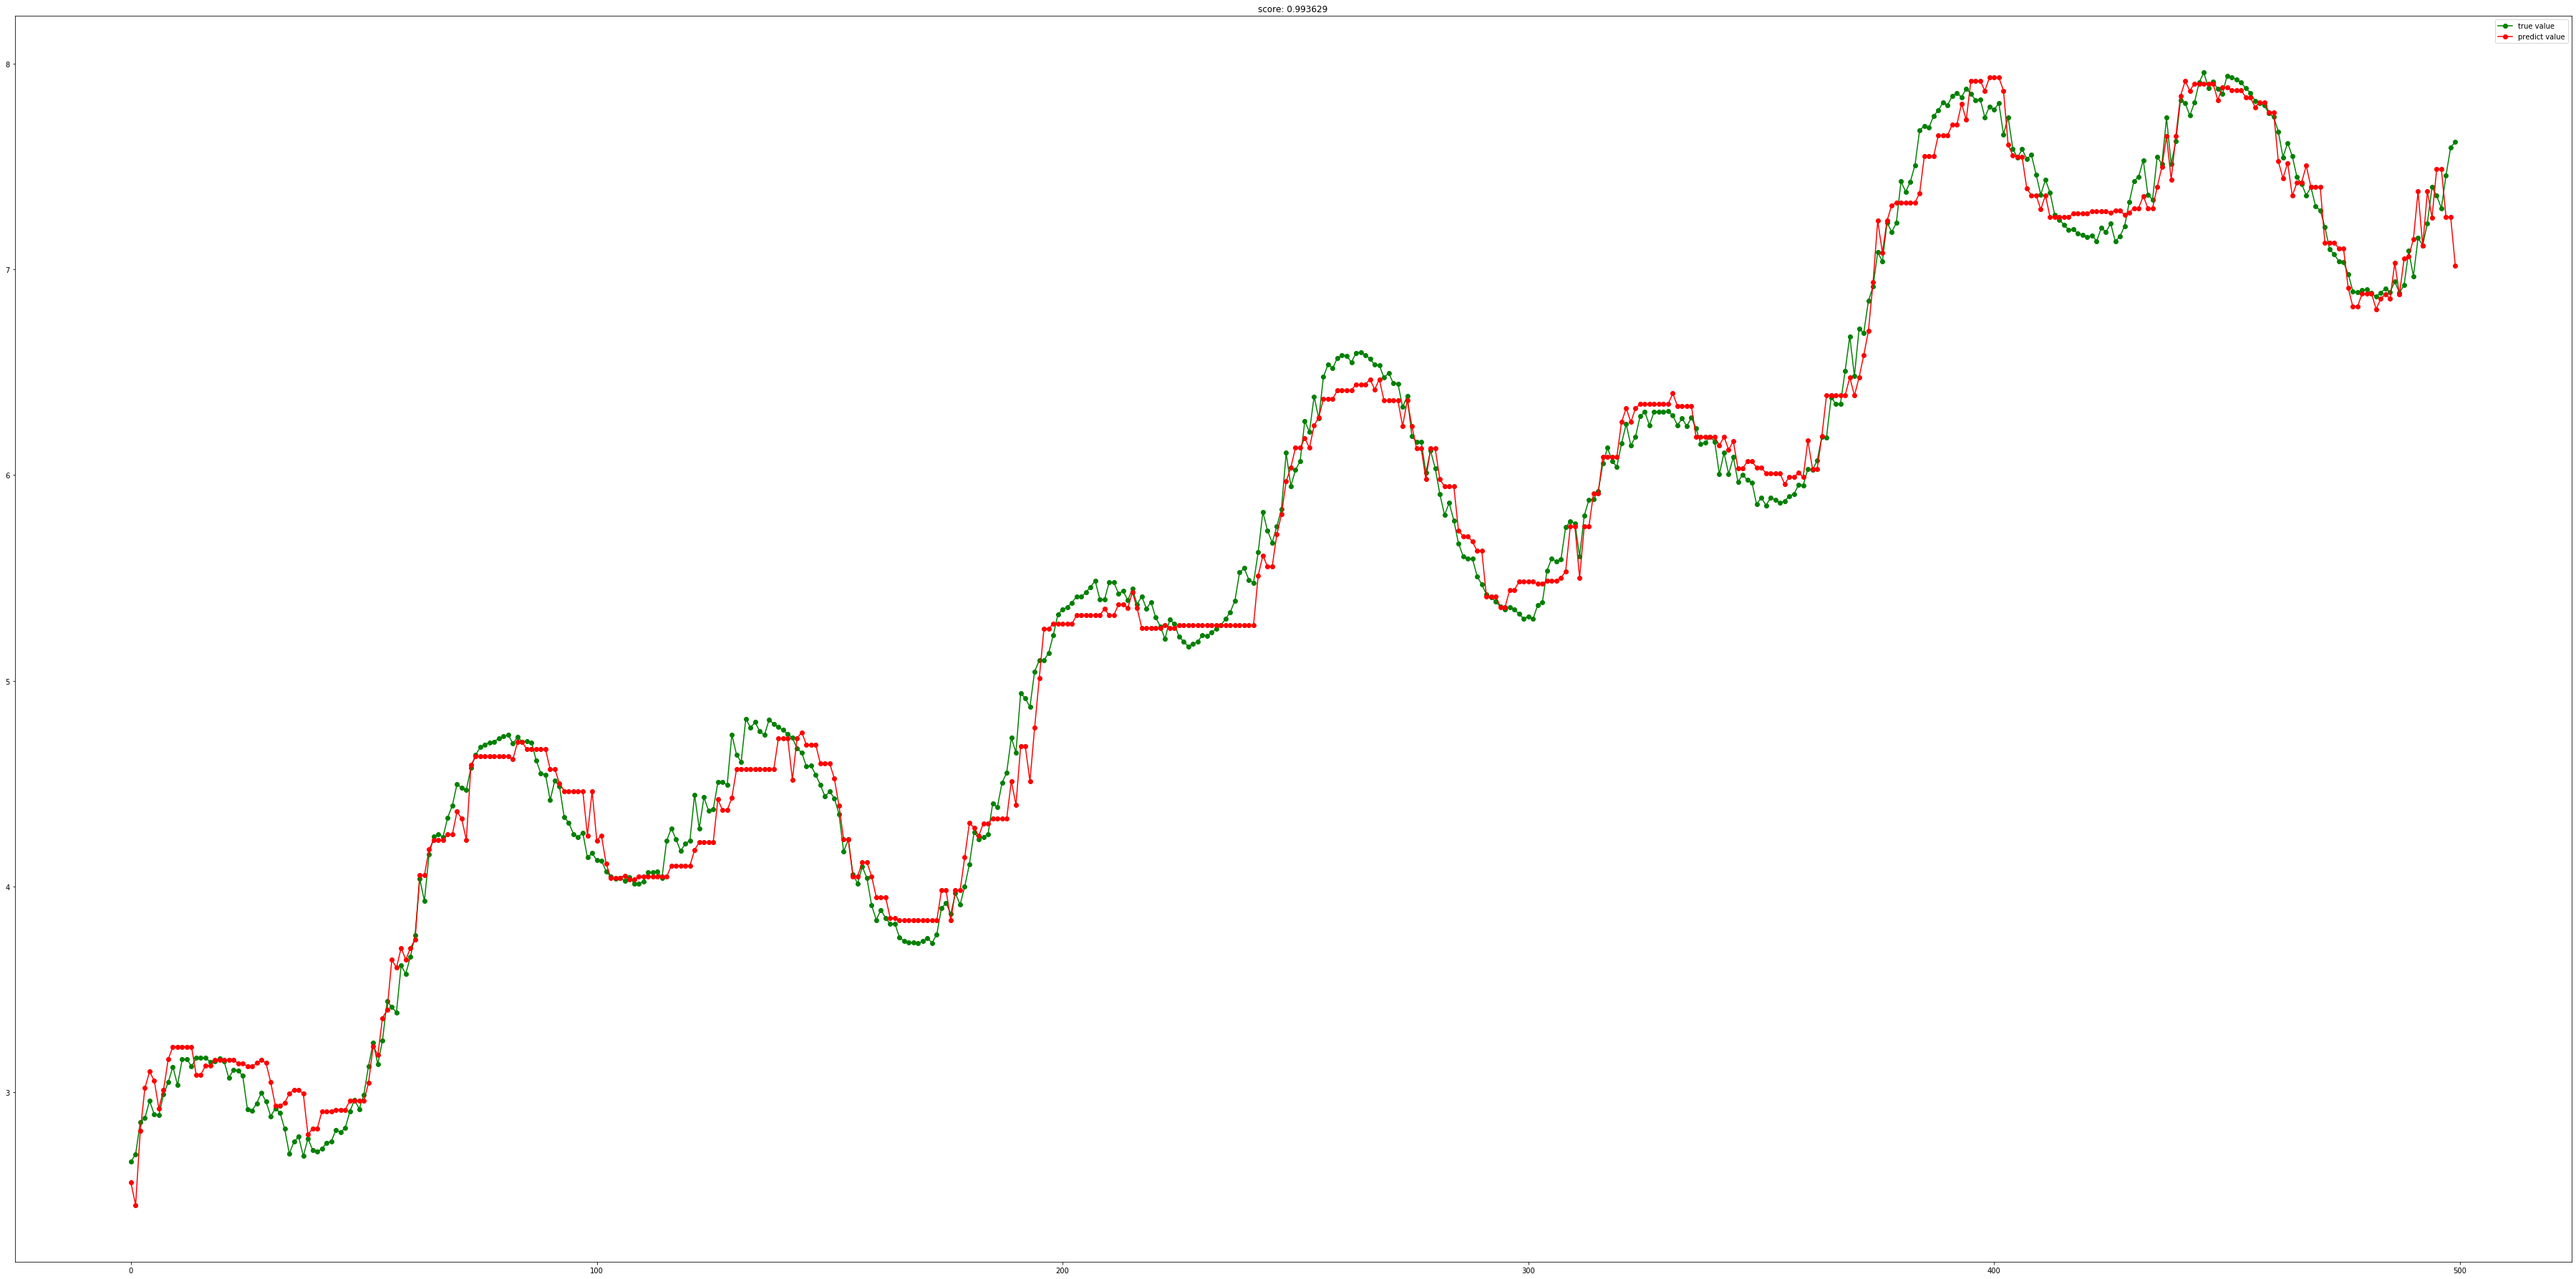

In [74]:
# 渐进梯度决策树算法 Gradient BoostDecision Tree GBRT

gbrt = ensemble.GradientBoostingRegressor(n_estimators=100)

try_different_method(gbrt)